

# **Systèmes de détection d’intrusion (IDS)**

Un **système de détection d’intrusion (IDS)** est un outil qui surveille le trafic réseau pour repérer toute activité suspecte et génère des alertes lorsqu’une anomalie est détectée. Il s’agit d’une application logicielle qui analyse un réseau ou un système afin d’identifier des actions dangereuses ou des violations de politiques de sécurité.
Toute activité malveillante ou anomalie est généralement signalée à un administrateur ou centralisée dans un système de **gestion des informations et des événements de sécurité (SIEM)**. Un SIEM regroupe les données provenant de plusieurs sources et utilise des techniques de filtrage d’alertes pour différencier les véritables menaces des faux positifs.

---

## **Types d’IDS**

### **1. IDS basé sur l’hôte (HIDS)**

Un HIDS est installé directement sur une machine spécifique et sert à la protéger contre les menaces internes et externes.
Il peut :

* surveiller le trafic réseau entrant et sortant de la machine,
* observer les processus en cours,
* examiner les journaux système.

Sa visibilité se limite à l’ordinateur sur lequel il est installé, ce qui réduit le contexte global mais lui donne une vision très détaillée de l’intérieur du système.

### **2. IDS basé sur le réseau (NIDS)**

Un NIDS surveille l’ensemble d’un réseau protégé.
Il observe :

* tout le trafic circulant sur le réseau,
* les métadonnées et le contenu des paquets.

Grâce à cette vue d’ensemble, il peut repérer des menaces étendues.
En revanche, il n’a pas accès aux détails internes des appareils individuels qu’il protège.

---

## **Méthodes de détection des IDS**

### **Méthode à base de signatures**

Un IDS basé sur les signatures identifie les attaques en se basant sur des modèles connus :

* motifs spécifiques dans le trafic (par ex. type de données ou suites de bits),
* séquences d’instructions déjà associées à des logiciels malveillants.

Il détecte facilement les attaques dont la signature est déjà enregistrée, mais il a du mal à repérer les nouvelles menaces inconnues.

---

### **Méthode à base d’anomalies**

Créée pour détecter les attaques nouvelles ou inconnues, cette méthode utilise des techniques d’apprentissage automatique.
Le système construit un modèle de comportement normal, puis compare toute nouvelle activité à ce modèle.
Si une action ne correspond pas au modèle, elle est considérée comme suspecte.

L’approche par anomalies est plus flexible que celle basée sur les signatures, car les modèles peuvent être entraînés selon les applications et la configuration matérielle du système.

---



### Importation des bibliothèques nécessaires <hr>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

import xgboost as xgb 
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

import warnings

# Ignorer tous les warnings
warnings.filterwarnings("ignore")

### Exploration du Dataset <hr>

In [2]:
df=pd.read_csv("KDDTrain+.txt")
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [3]:
df.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [4]:
df.shape

(125972, 43)

In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [6]:
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
df['outcome'].value_counts()

outcome
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [8]:
df.loc[df['outcome'] == "normal", "outcome"] = 'normal'
df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'

In [9]:
df['outcome'].value_counts()

outcome
normal    67342
attack    58630
Name: count, dtype: int64

In [10]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome', 'level'],
      dtype='object')

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
print(df.columns.tolist())


['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level']


In [13]:
print(df.dtypes.value_counts())

int64      24
float64    15
object      4
Name: count, dtype: int64


### EDA <hr>

### Box Plot :

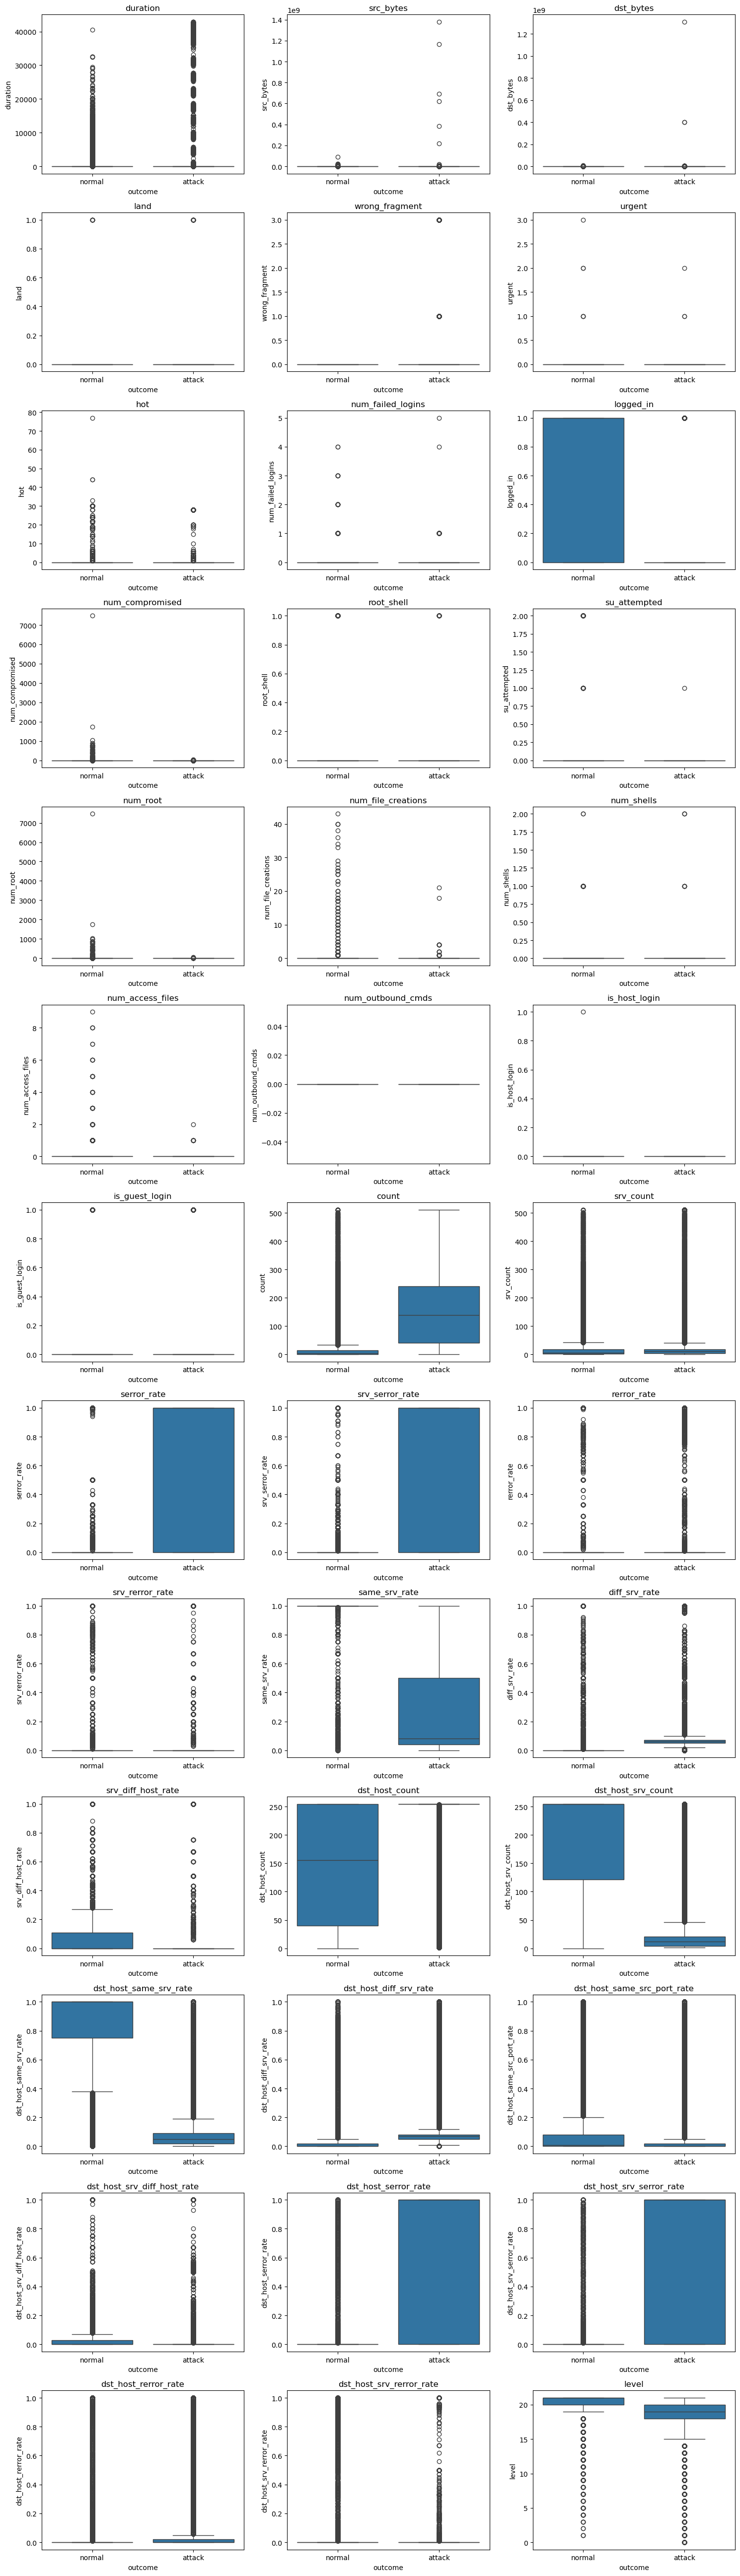

In [14]:

# Sélectionner uniquement les colonnes numériques
import math


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'outcome' in numerical_cols:
    numerical_cols.remove('outcome')

# Définir le nombre de colonnes pour la figure
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Créer la figure avec des sous-graphes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # pour accéder facilement aux axes

# Boucle pour créer chaque boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='outcome', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Supprimer les axes vides si le nombre de colonnes n'est pas un multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Scatterplot

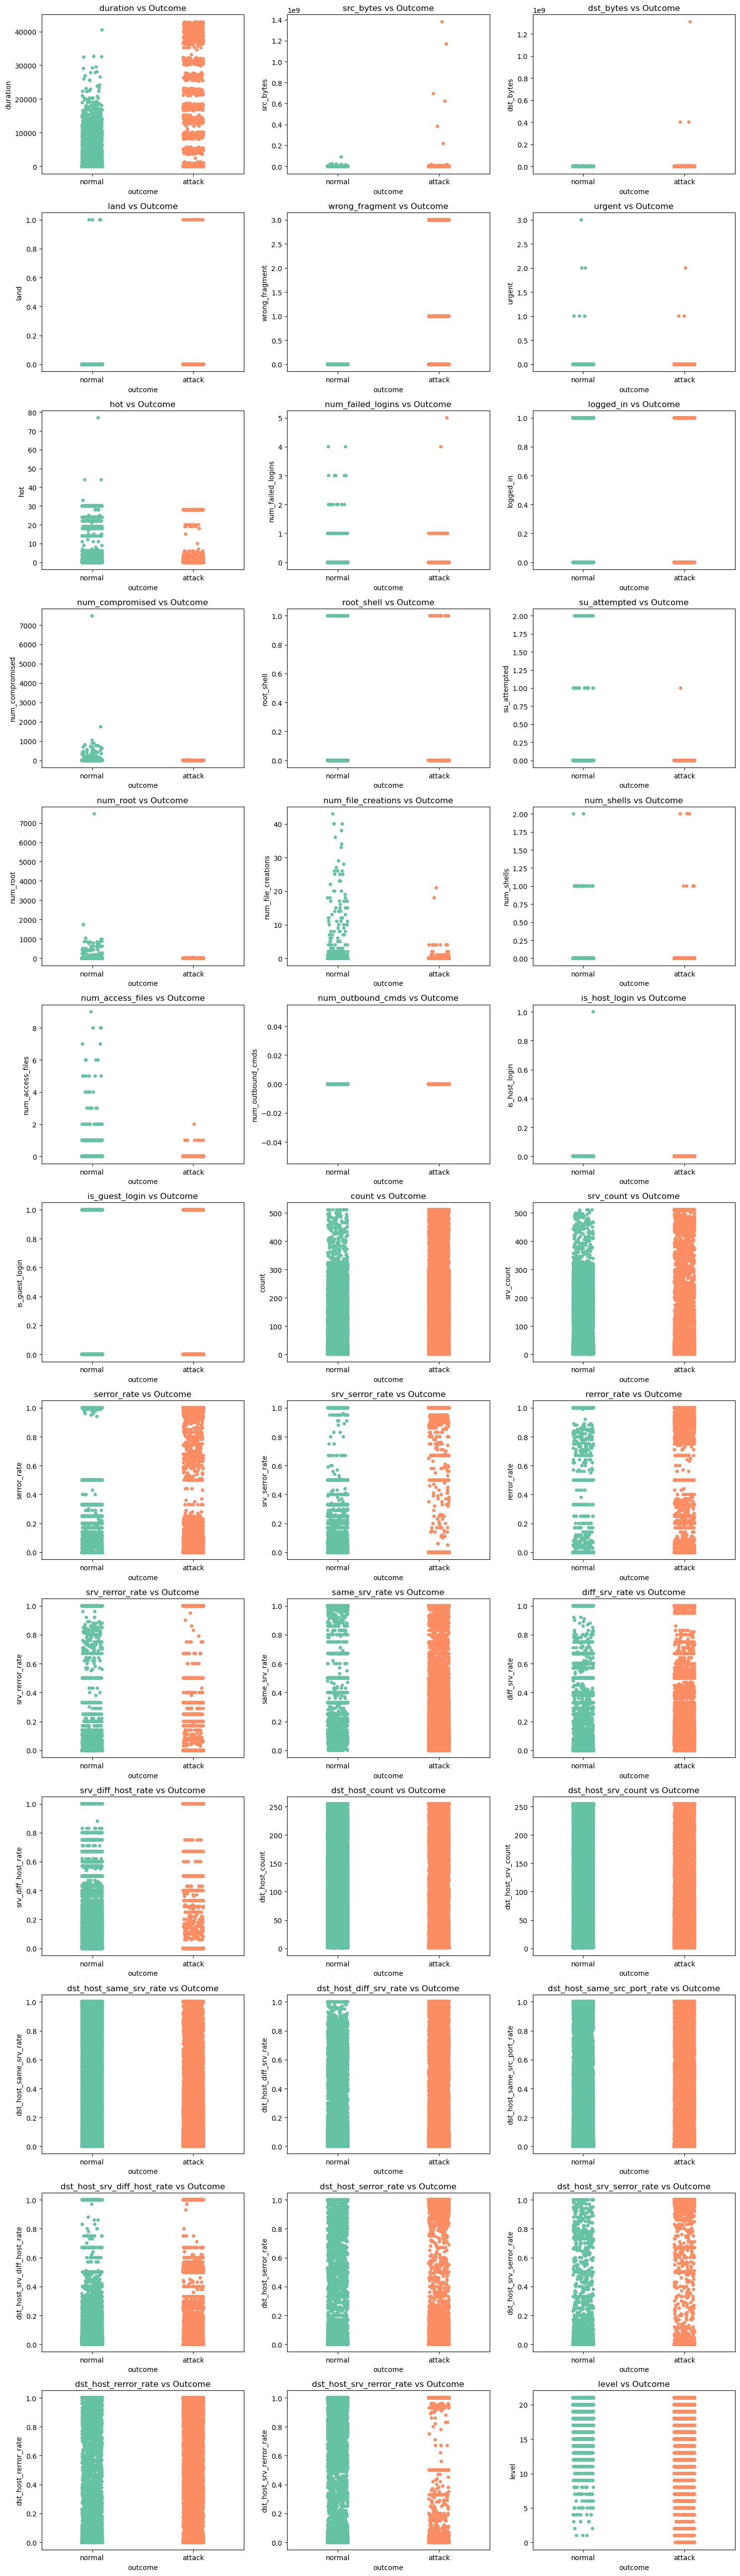

In [15]:


# Sélectionner uniquement les colonnes numériques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'outcome' in numerical_cols:
    numerical_cols.remove('outcome')

# Définir le nombre de colonnes par ligne
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Créer la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Boucle pour créer un stripplot pour chaque colonne vs 'outcome'
for i, col in enumerate(numerical_cols):
    sns.stripplot(x='outcome', y=col, data=df, ax=axes[i], jitter=True, palette="Set2")
    axes[i].set_title(f'{col} vs Outcome')

# Supprimer les axes vides si nécessaire
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


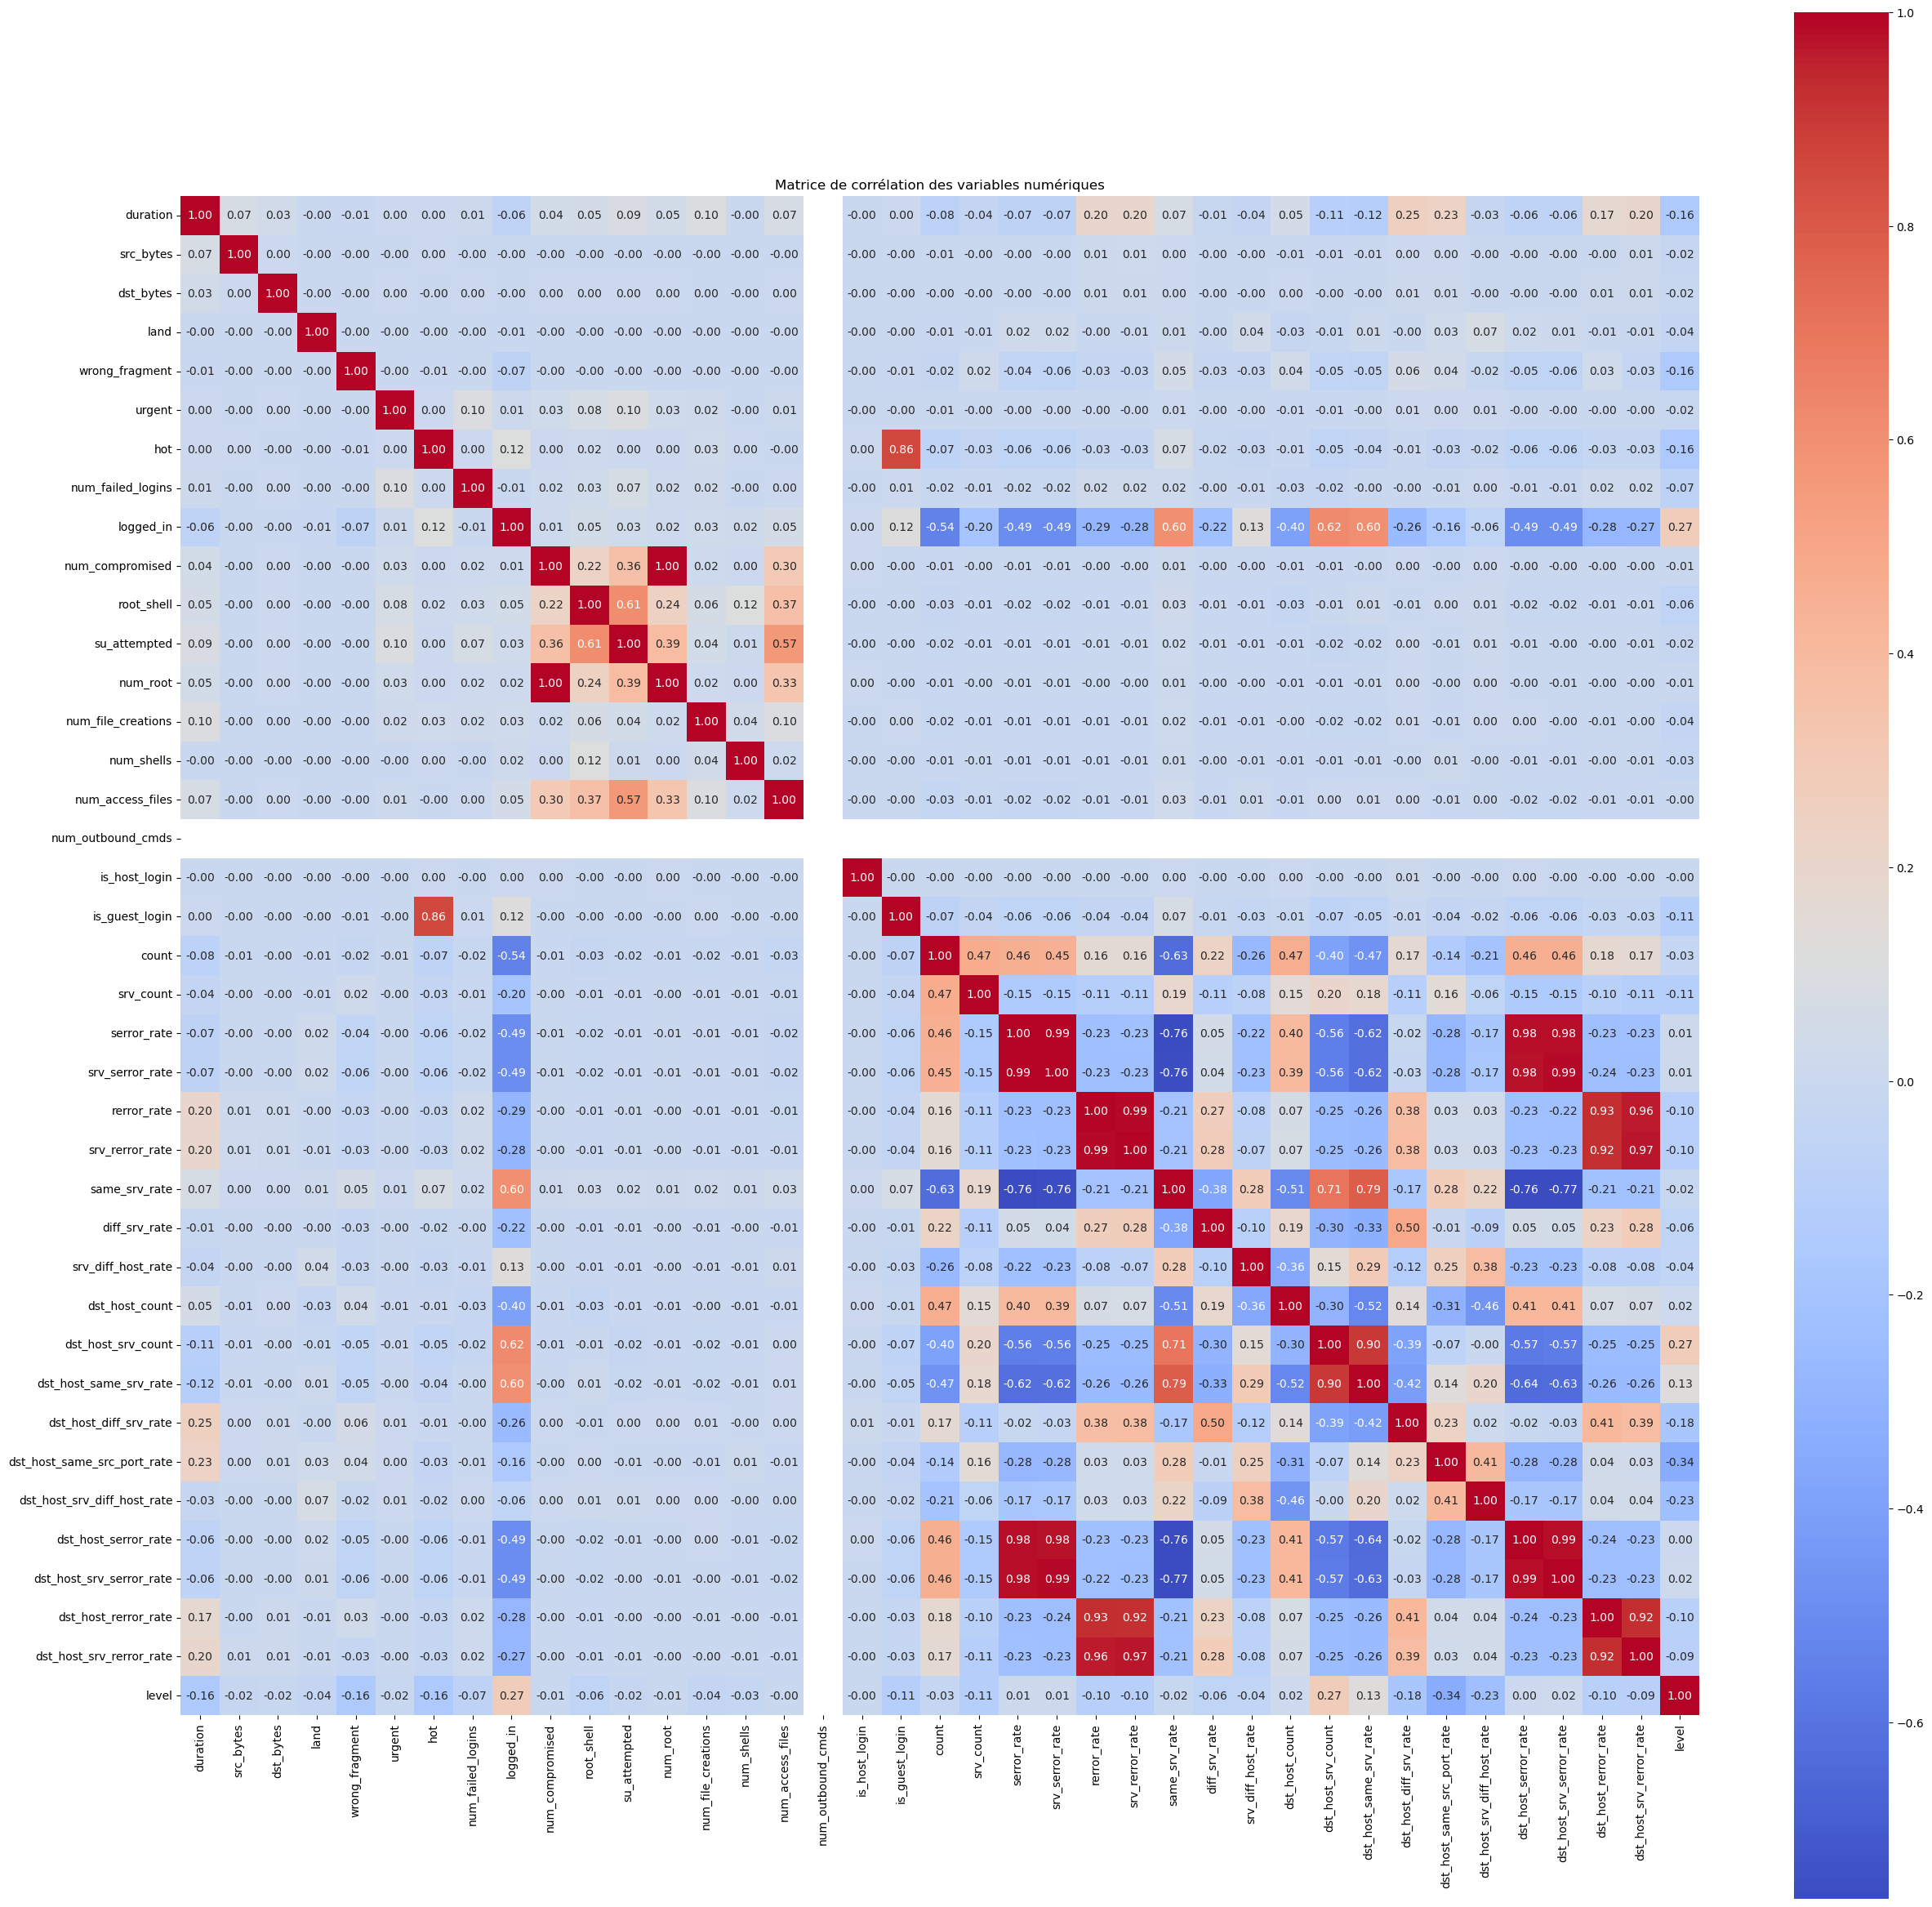

In [16]:
# Sélectionner uniquement les colonnes numériques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculer la matrice de corrélation
corr_matrix = df[numerical_cols].corr()

# Afficher la heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

### Preprocessing the data <hr>

Cette fonction normalise les données numériques d’un DataFrame en utilisant RobustScaler, qui réduit l’influence des valeurs extrêmes (outliers).
Elle retourne un nouveau DataFrame avec les colonnes normalisées.

In [17]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()                     # 1) On crée un scaler robuste
    std_scaler_temp = std_scaler.fit_transform(df_num)  # 2) On adapte le scaler aux données et on les transforme
    std_df = pd.DataFrame(std_scaler_temp, columns=cols) # 3) On remet les données transformées dans un DataFrame
    return std_df                                    # 4) On renvoie le DataFrame normalisé


La fonction  prépare un DataFrame ou Elle sépare d’abord les colonnes numériques, les normalise avec RobustScaler, puis remplace les anciennes valeurs par les versions normalisées. Ensuite, elle transforme la colonne outcome en variable binaire (0 pour "normal", 1 pour le reste). Enfin, elle convertit les colonnes catégorielles protocol_type, service et flag en variables indicatrices grâce à get_dummies. Le DataFrame final est donc entièrement numérique et prêt pour un modèle de classification.

In [18]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [19]:
scaled_train = preprocess(df)

In [20]:
scaled_train

,land,logged_in,is_host_login,is_guest_login,outcome,level,duration,src_bytes,dst_bytes,wrong_fragment,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,15,0.0,0.369565,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,1,19,0.0,-0.159420,0.000000,0.0,...,False,False,False,False,True,False,False,False,False,False
2,0,1,0,0,0,21,0.0,0.681159,15.800388,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0,1,0,0,0,21,0.0,0.561594,0.813953,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,1,21,0.0,-0.159420,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,1,20,0.0,-0.159420,0.000000,0.0,...,False,False,False,False,True,False,False,False,False,False
125968,0,0,0,0,0,21,8.0,0.221014,0.281008,0.0,...,False,False,False,False,False,False,False,False,True,False
125969,0,1,0,0,0,18,0.0,7.923913,0.744186,0.0,...,False,False,False,False,False,False,False,False,True,False
125970,0,0,0,0,1,20,0.0,-0.159420,0.000000,0.0,...,False,False,False,False,True,False,False,False,False,False


### Principal Component Analysis <hr>

L’analyse en composantes principales, ou PCA, est une technique statistique qui permet de convertir des données de haute dimension en données de plus faible dimension en sélectionnant les caractéristiques les plus importantes, celles qui capturent le maximum d’informations sur le jeu de données. Les caractéristiques sont choisies en fonction de la variance qu’elles produisent dans les résultats. Celle qui entraîne la variance la plus élevée est appelée première composante principale. Celle qui produit la deuxième variance la plus élevée est la deuxième composante principale, et ainsi de suite. Il est important de noter que les composantes principales ne présentent aucune corrélation entre elles.

In [21]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20


In [22]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

### Modeling <hr>

## Régression Logistique

### Description
La régression logistique est un modèle de classification qui prédit une **probabilité** (0 à 1) grâce à la **fonction sigmoïde**.  
Elle apprend des **coefficients** pour chaque caractéristique en minimisant la **cross-entropy**.

### Pourquoi l'utiliser pour la détection d'intrusion ?
- **Interprétable** : montre quelles caractéristiques indiquent une attaque.  
- **Rapide** : adaptée à l’analyse en temps réel.  
- **Solide baseline** pour comparer d’autres modèles.  
- Fonctionne bien avec **PCA**.  
- Gère le **déséquilibre des classes** via `class_weight`.


Training Accuracy Logistic Regression 96.65598301199678  Test Accuracy Logistic Regression 96.53105774955348
Training Precesion Logistic Regression 96.65027592278457  Test Precesion Logistic Regression 96.5042102577188
Training Recall Logistic Regression 96.13421328036564  Test Recall Logistic Regression 96.07926158015073


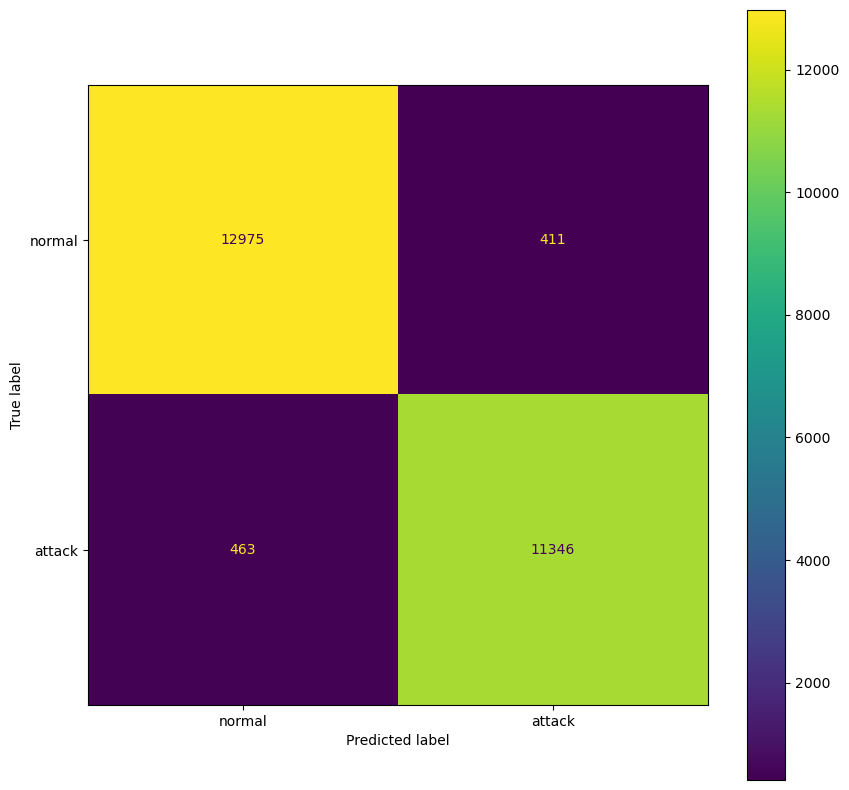

In [23]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(x_train_reduced, y_train)

evaluate_classification(log_reg, "Logistic Regression", x_train_reduced, x_test_reduced, y_train, y_test)